<a href="https://colab.research.google.com/github/raj93w99/EV-Market-Analysis/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [ ]:
!pip3 install KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Indian automoble buying behavour study 1.0.csv to Indian automoble buying behavour study 1.0 (1).csv


Read the Data

In [ ]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [ ]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


<ipython-input-164-836cda2a4a58>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
<ipython-input-164-836cda2a4a58>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
<ipython-input-164-836cda2a4a58>:7: UserWarning: 

`distplot` is a deprecated function and will 

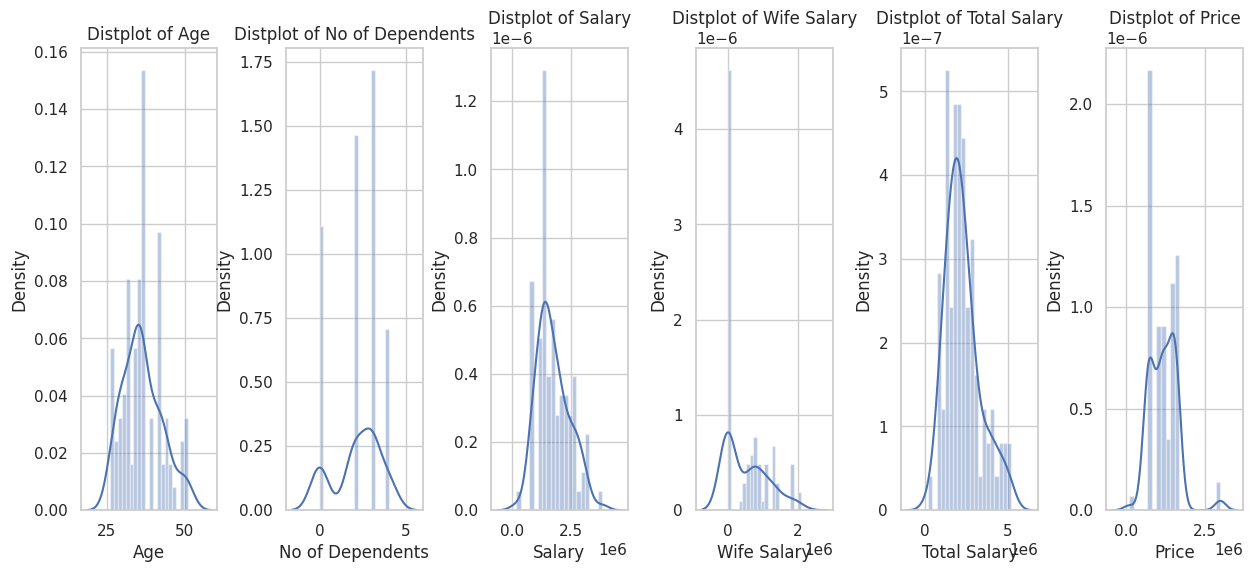

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

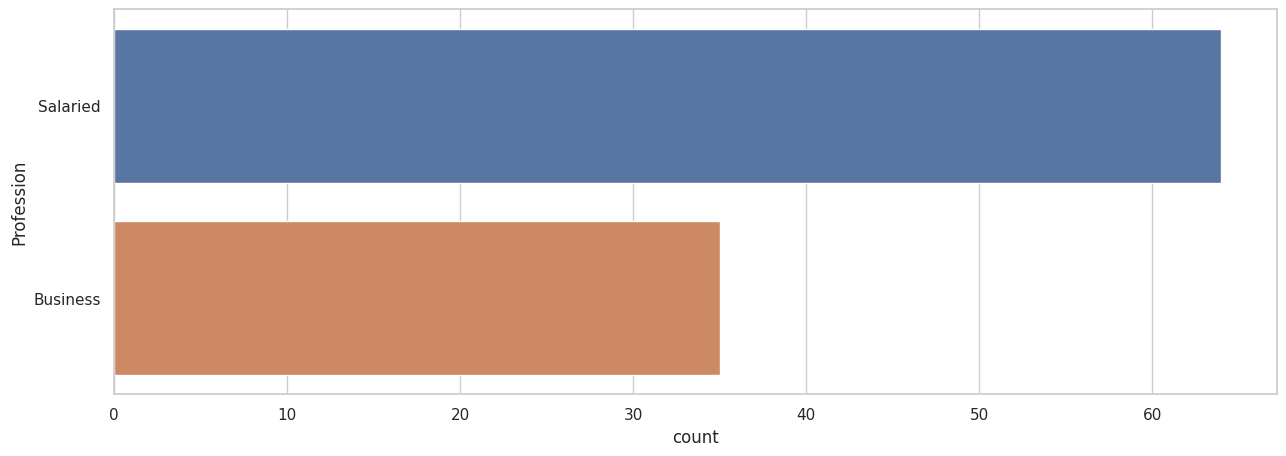

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profession',data=df)
plt.show()

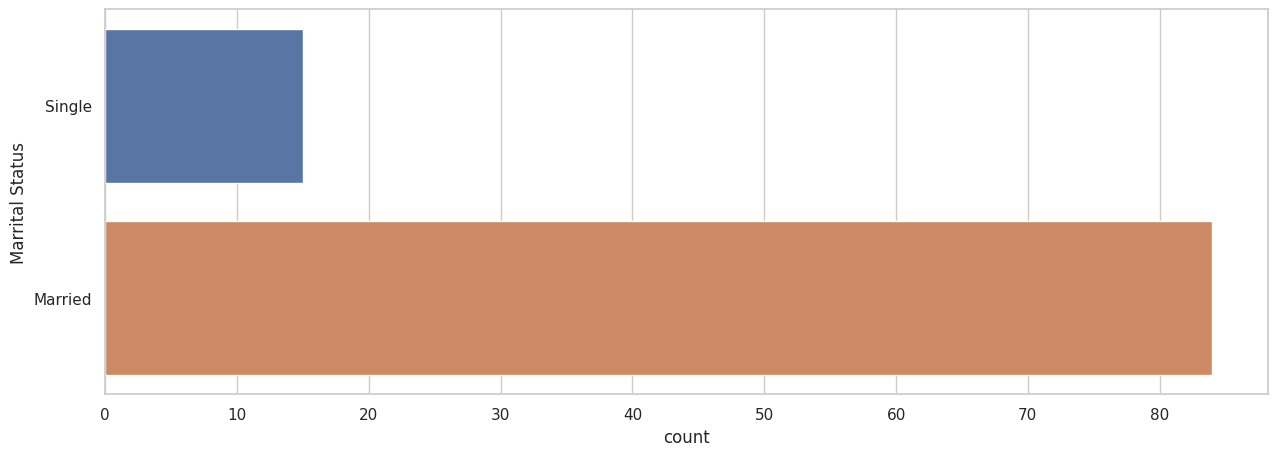

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Marrital Status',data=df)
plt.show()

In [ ]:
df.loc[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [ ]:

df = df.replace(to_replace ="m",value ="No")

In [ ]:
df.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


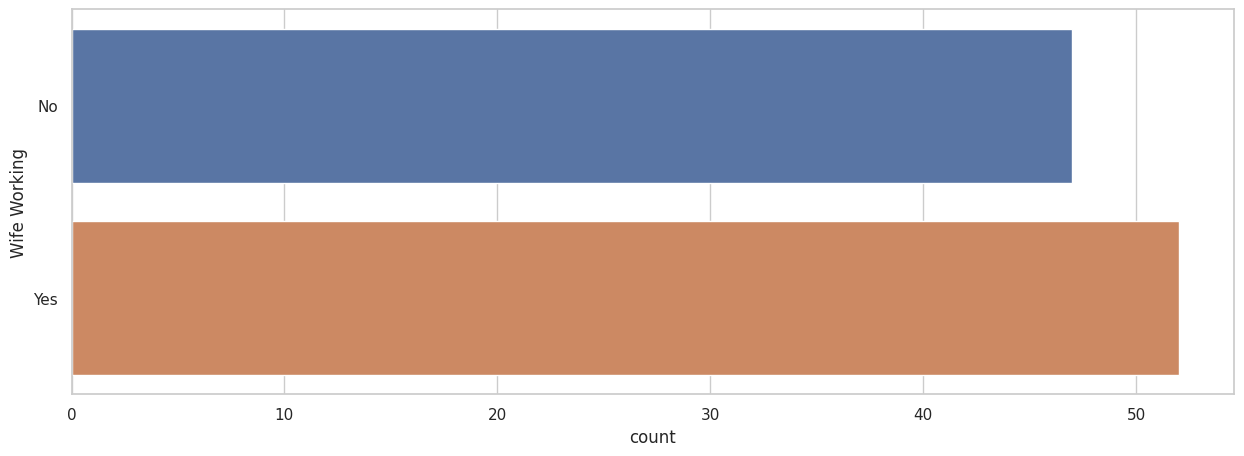

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=df)
plt.show()

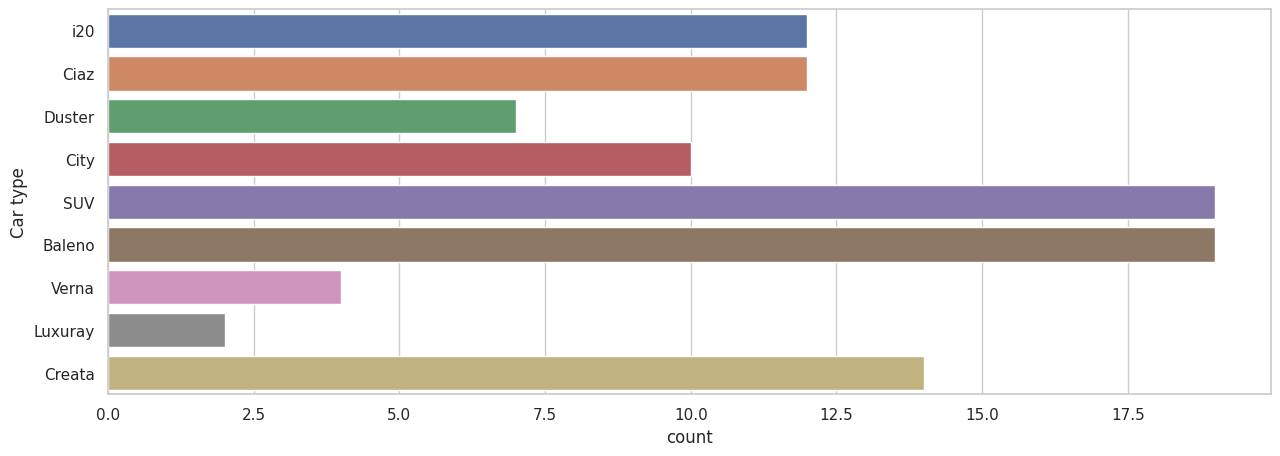

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=df)
plt.ylabel('Car type')
plt.show()


<ipython-input-173-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

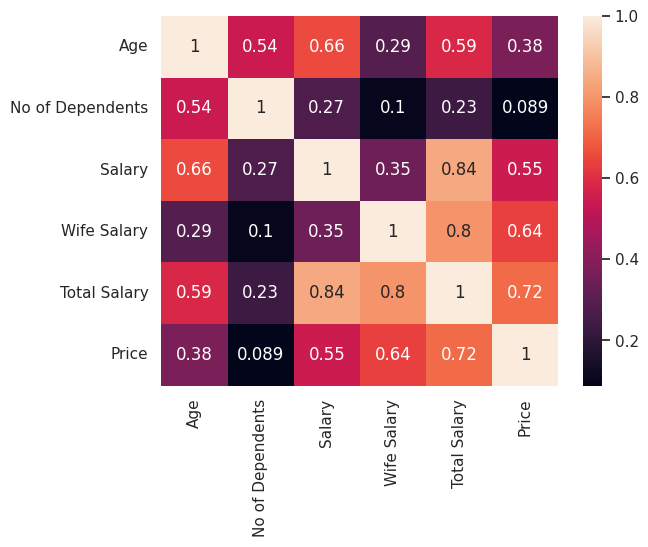

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Make', ylabel='count'>

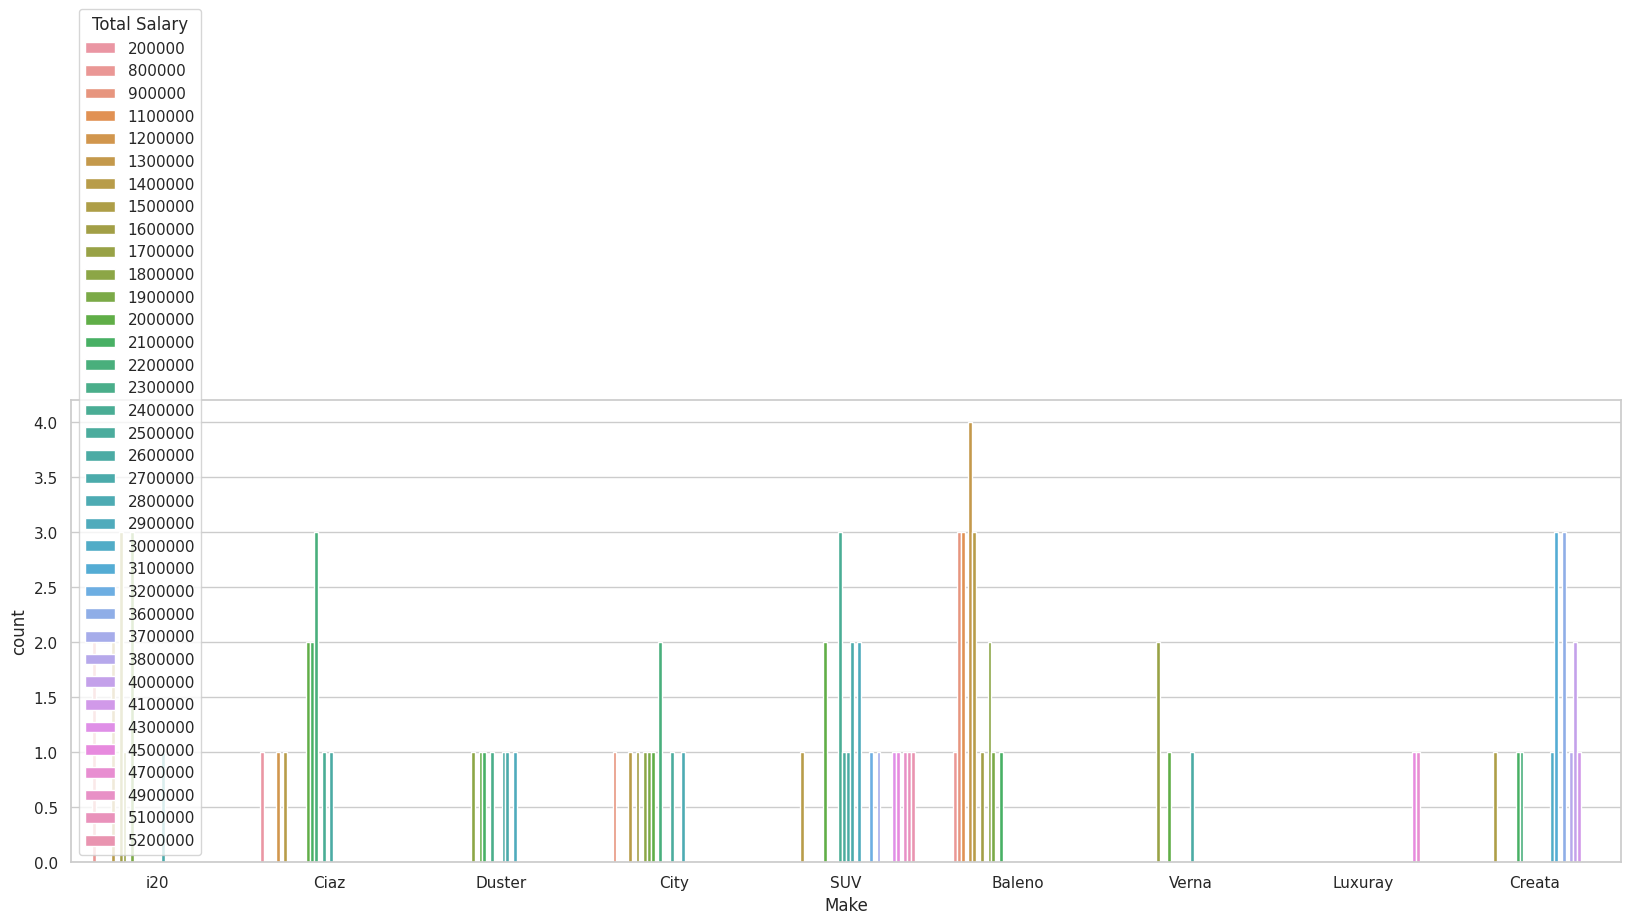

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")

<Axes: xlabel='Make', ylabel='count'>

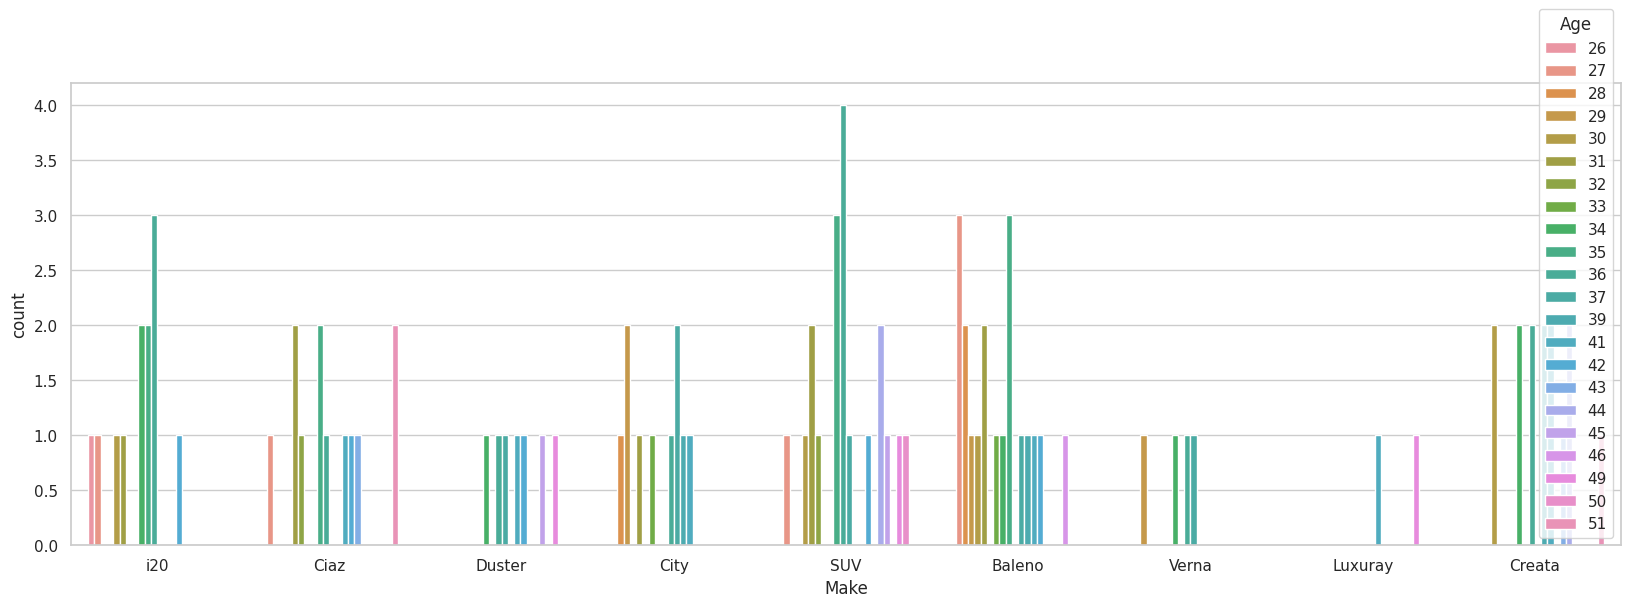

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")

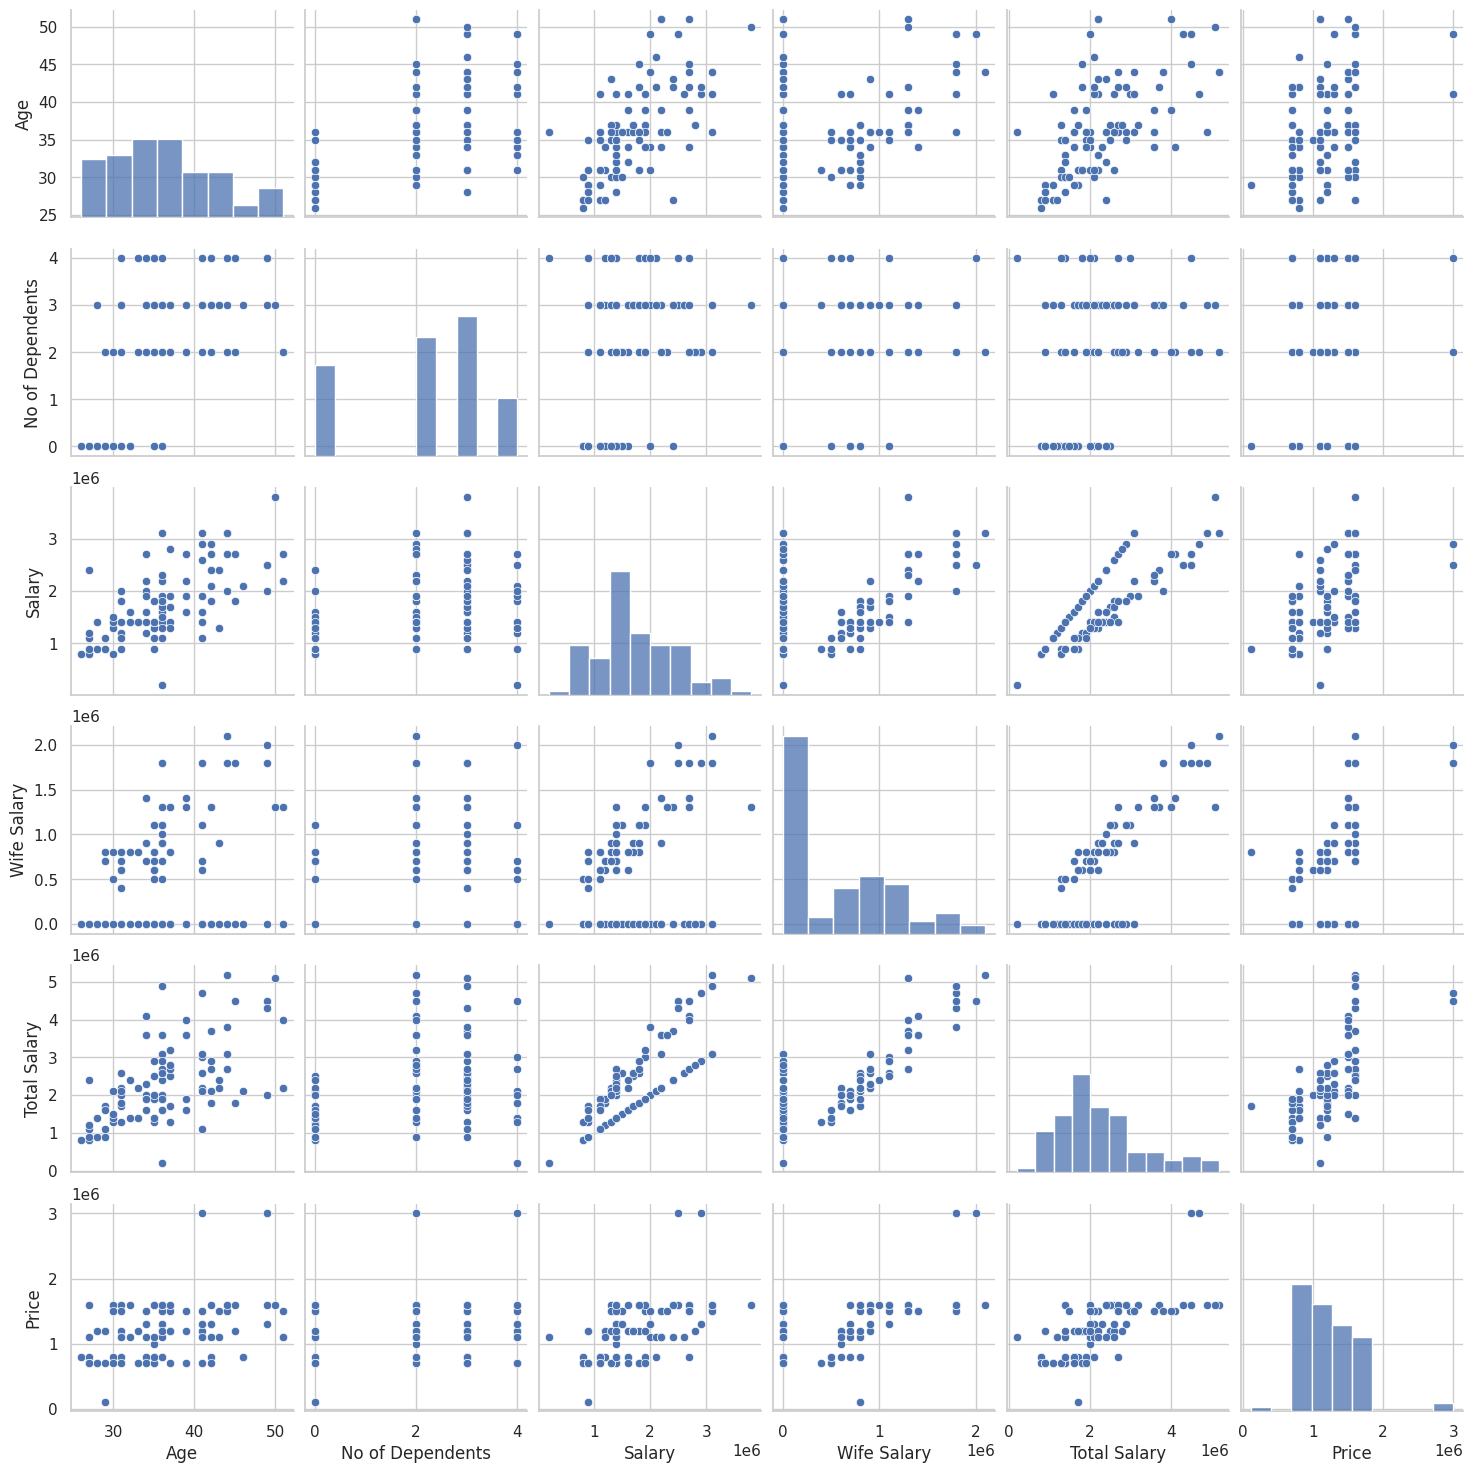

In [ ]:
sns.pairplot(df)

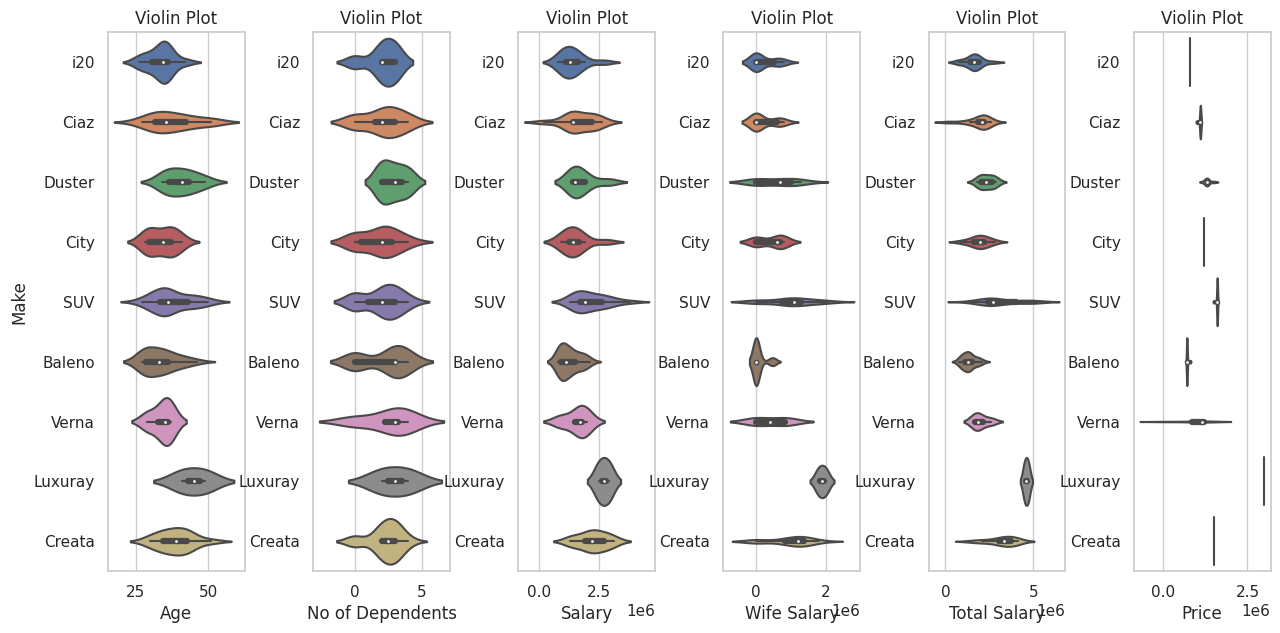

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=df)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

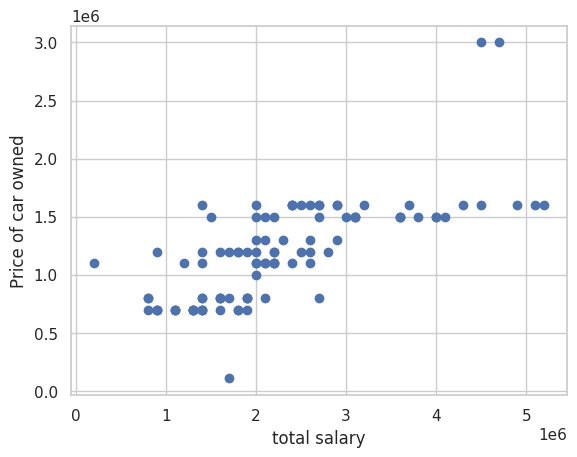

In [ ]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Total Salary'],df['Price'])

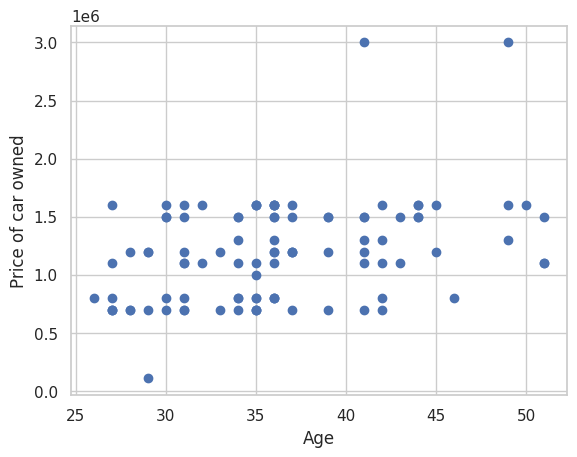

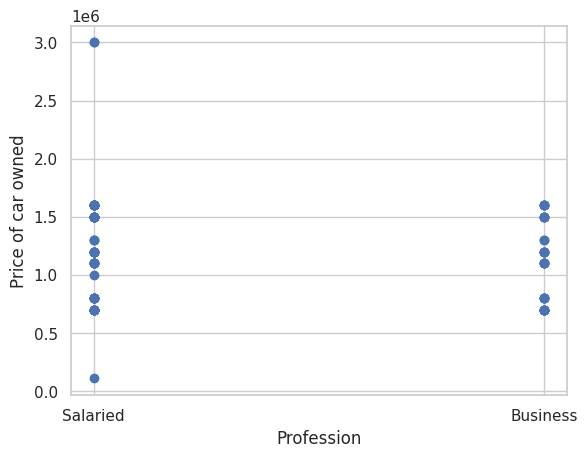

In [ ]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(df['Profession'],df['Price'])
plt.show()

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns =  ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']


df[columns] = df[columns].apply(LabelEncoder().fit_transform)


df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [ ]:
data_price = df.drop('Make',axis=1)
data_price.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [ ]:
data_car = df.drop('Price',axis=1)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,i20
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV


In [ ]:
le = LabelEncoder()
data_car.Make = le.fit_transform(data_car.Make)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6


# **Clustering According to the price of the vehicle owned**

In [ ]:
features = list(data_price.columns)
d = data_price[features]

In [ ]:
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Price']

In [ ]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2, init='k-means++')
d['clusters'] = clustering_kmeans.fit_predict(d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Total salary')

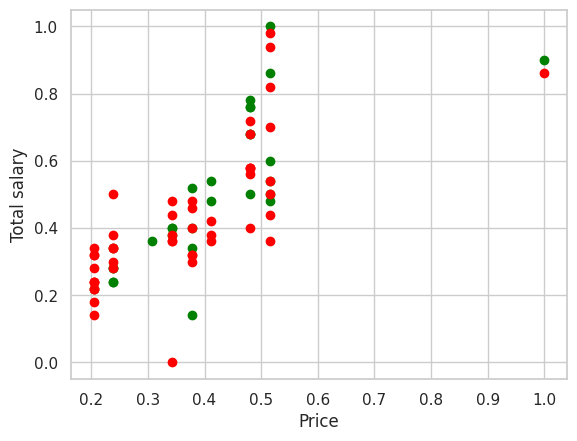

In [ ]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d)

d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

In [ ]:
x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled

In [ ]:
x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled


x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled


x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

In [ ]:
d['clusters'] = clustering_kmeans.fit_predict(d)
d

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,0


In [ ]:
clustering_kmeans.cluster_centers_

array([[ 5.01666667e-01,  5.83333333e-01,  8.32667268e-17,
         5.41666667e-01,  3.29166667e+00,  3.95833333e-01,
         4.58333333e-01,  5.20833333e-01,  4.49652778e-01,
         2.50000000e-01,  4.28750000e-01,  3.69232987e-01,
         2.00000000e+00],
       [ 4.73103448e-01,  7.58620690e-01,  6.89655172e-02,
         6.20689655e-01,  2.00000000e+00,  3.10344828e-01,
         5.17241379e-01,  6.20689655e-01,  4.93295019e-01,
         3.53037767e-01,  5.03448276e-01,  4.15344231e-01,
         8.88178420e-16],
       [ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
        -5.55111512e-17,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01,
         1.00000000e+00]])

In [ ]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(data_car)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[188597373742251.56,
 80722982090438.47,
 49001083336795.37,
 32443374843957.125,
 25238072574613.812,
 18651511114219.91,
 14263394292627.61,
 11507509511996.277,
 9917764413897.46]

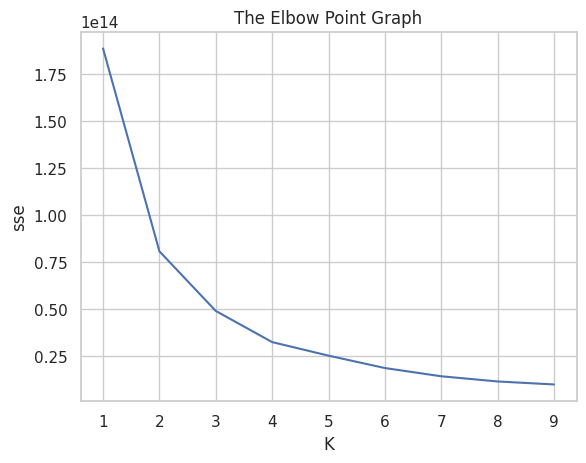

In [ ]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [ ]:
def plotseg(clus,Y, labels):
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


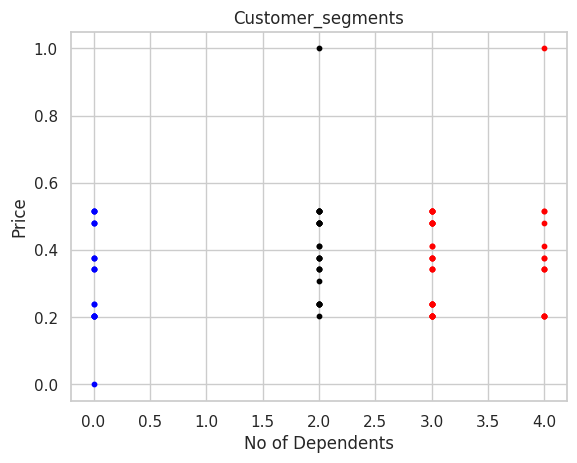

In [ ]:
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


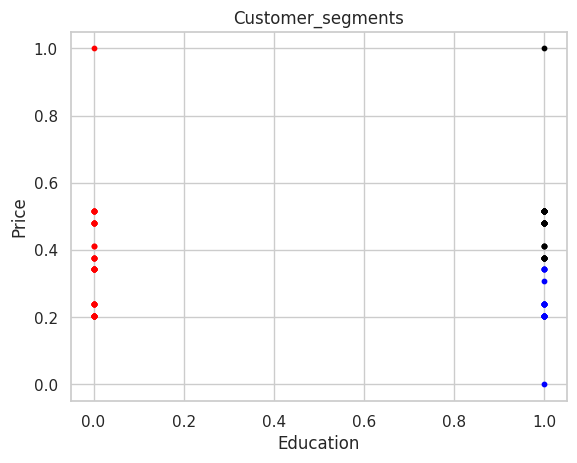

In [ ]:
clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


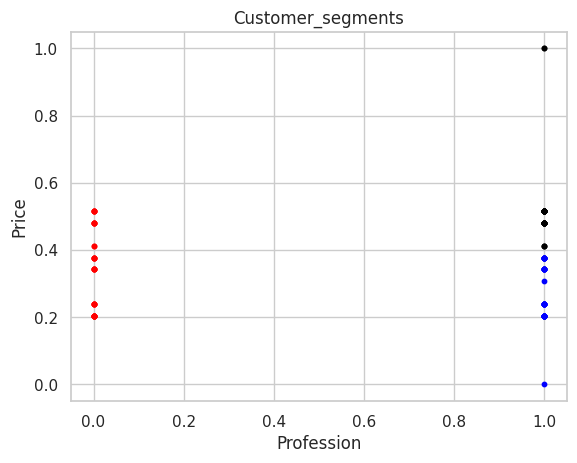

In [ ]:
clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


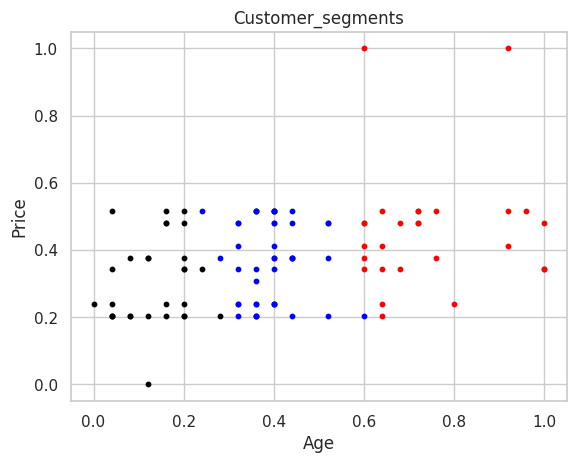

In [ ]:
clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


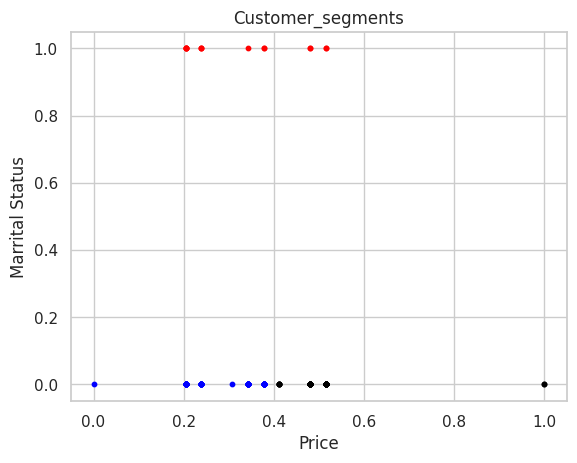

In [ ]:

clus = d.loc[:,["Price","Marrital Status"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Price","Marrital Status"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


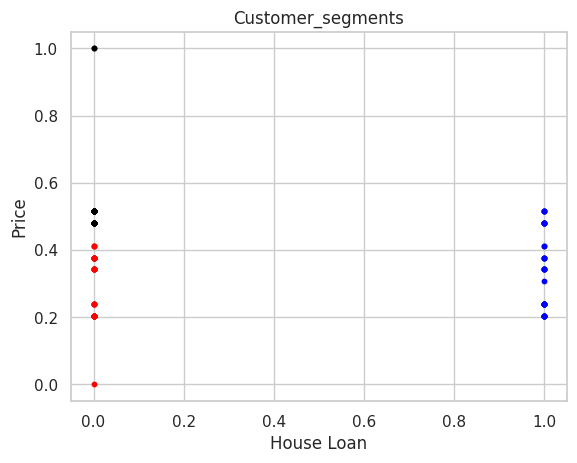

In [ ]:
clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


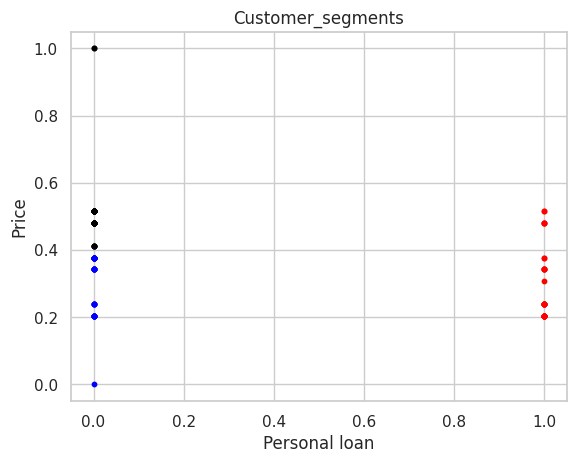

In [ ]:
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


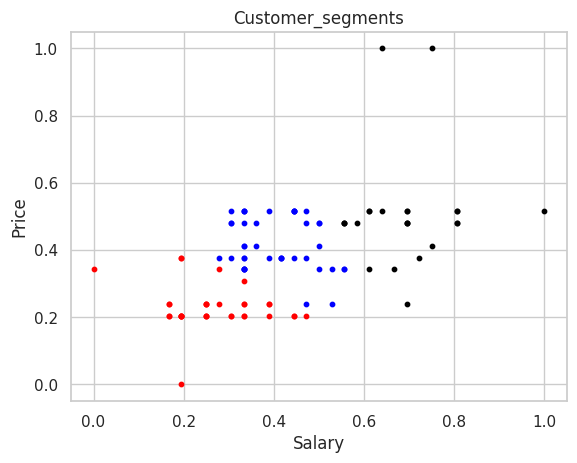

In [ ]:
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


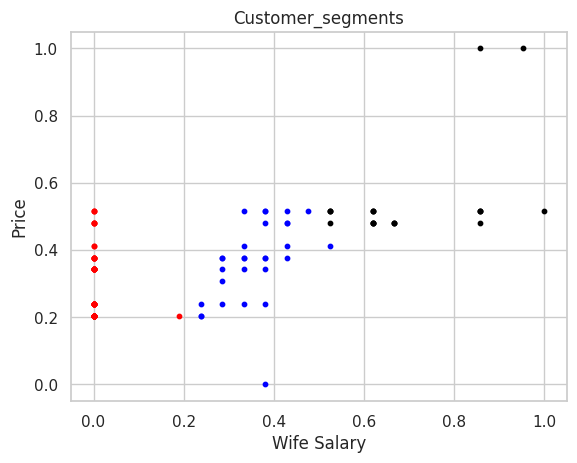

In [ ]:
clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"])

In [ ]:
clustering_kmeans = KMeans(n_clusters=3, init = 'k-means++')
d['clusters'] = clustering_kmeans.fit_predict(d)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
d


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,2
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,0
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,1
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,2
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,2


In [ ]:
labels = clustering_kmeans.labels_
labels

array([0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2], dtype=int32)

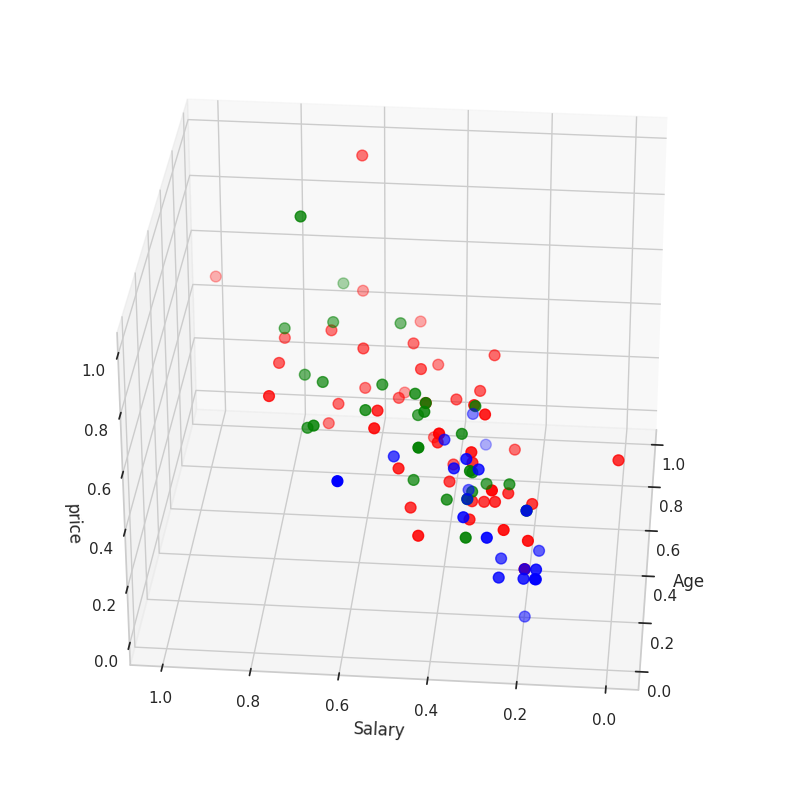

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

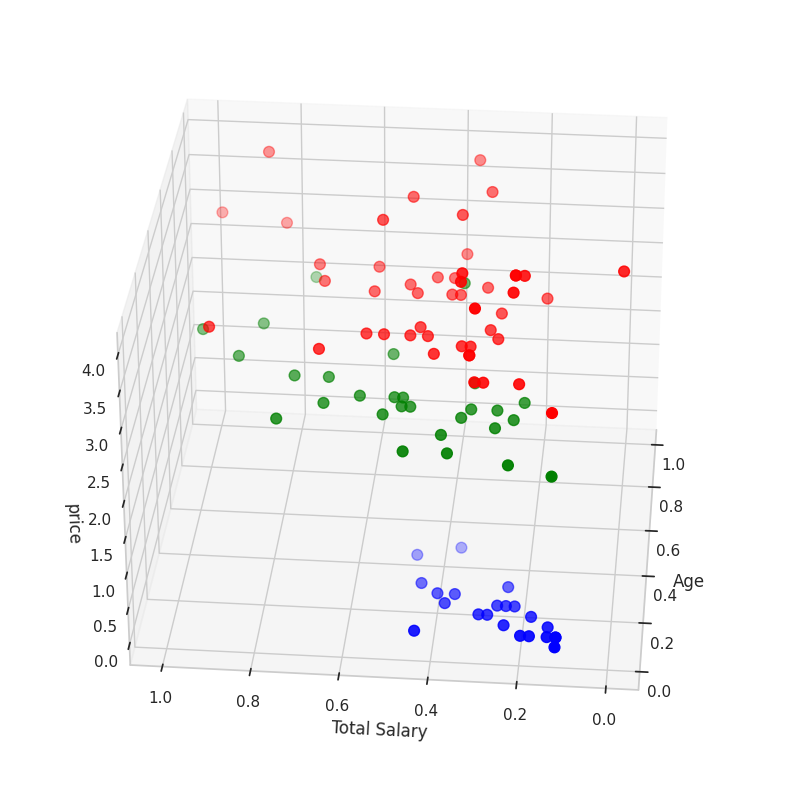

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

# **Clustering According to the type and model of the vehicle owned**

In [ ]:
feature = list(data_car.columns)
d_c = data_car[feature]


In [ ]:
d_c

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3


In [ ]:
x = d_c['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
df['Salary']= x_scaled


x = d_c['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df['Age']= x_scaled


x = d_c['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
df['Wife Salary']= x_scaled


x = d_c['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d_c['Total Salary']= x_scaled
d_c

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,0.12,8
1,35,1,0,1,2,1,1,1,1400000,600000,0.36,1
2,45,0,0,0,4,1,1,0,1800000,0,0.32,4
3,41,0,0,1,3,0,0,1,1600000,600000,0.40,2
4,31,1,0,1,2,1,0,1,1800000,800000,0.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,0.44,6
95,50,1,0,1,3,0,0,1,3800000,1300000,0.98,6
96,51,0,0,0,2,1,1,0,2200000,0,0.40,1
97,51,1,0,1,2,0,0,1,2700000,1300000,0.76,3


In [ ]:
k_range1 = range(1,10)
#sum of squared error
ssec = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d_c)
  ssec.append(km.inertia_)
  ssec

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
ssec

[80392323237205.42,
 43601477836583.336,
 25731102487874.438,
 15966702654706.08,
 12161187503210.512,
 9511053682693.043,
 7687799148270.111,
 6337678879628.771,
 5252977360909.722]

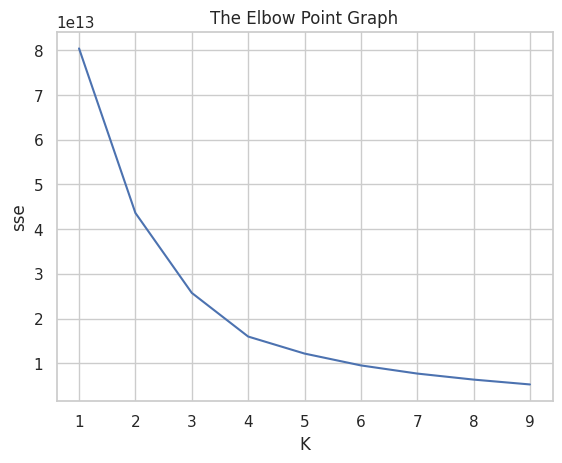

In [ ]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

In [ ]:
def plotsegm(clus,Y, labels):
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')


  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


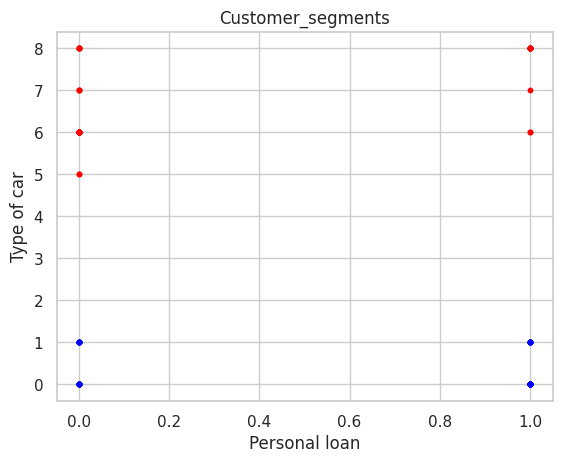

In [ ]:
clus = d_c.loc[:,["Personal loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Personal loan","Type of car"])

In [ ]:
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,2
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,0
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,1
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,2
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


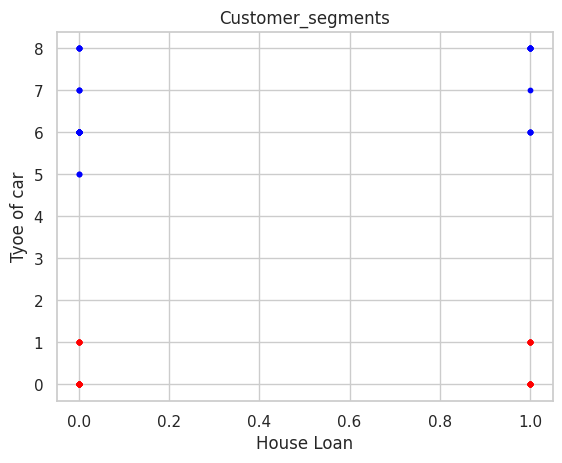

In [ ]:
clus = data_car.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Tyoe of car"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


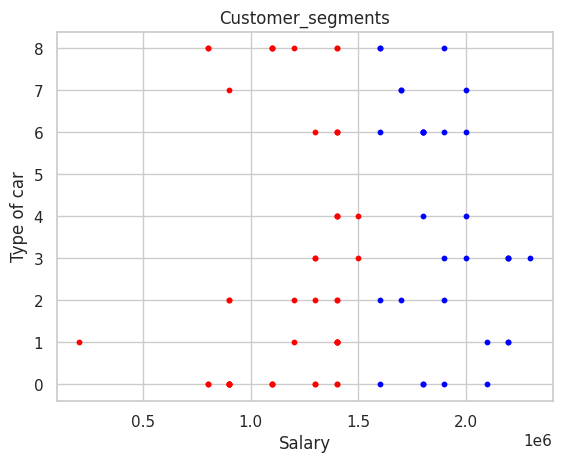

In [ ]:

clus = data_car.loc[:,["Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Salary","Type of car"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


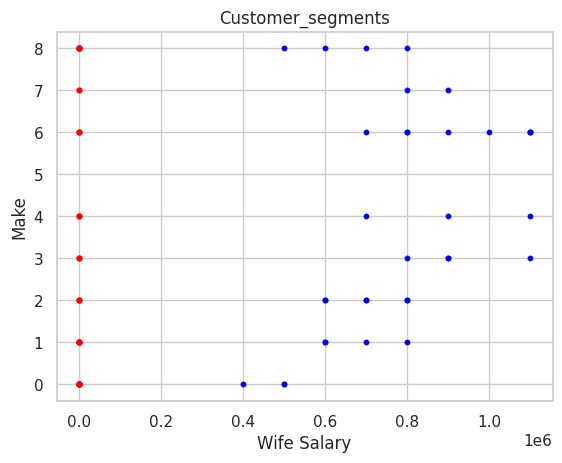

In [ ]:
clus = data_car.loc[:,["Wife Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Wife Salary","Make"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


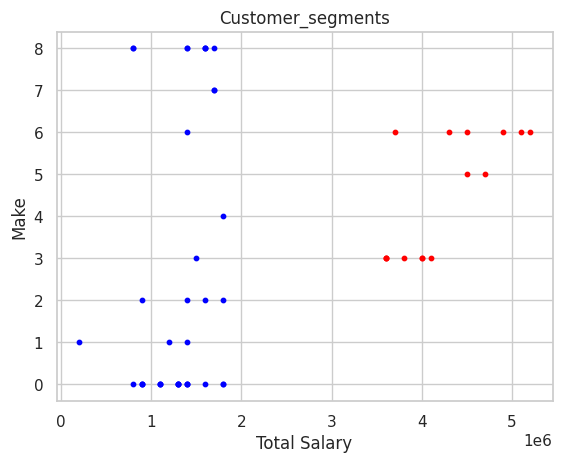

In [ ]:
clus = data_car.loc[:,["Total Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Total Salary","Make"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


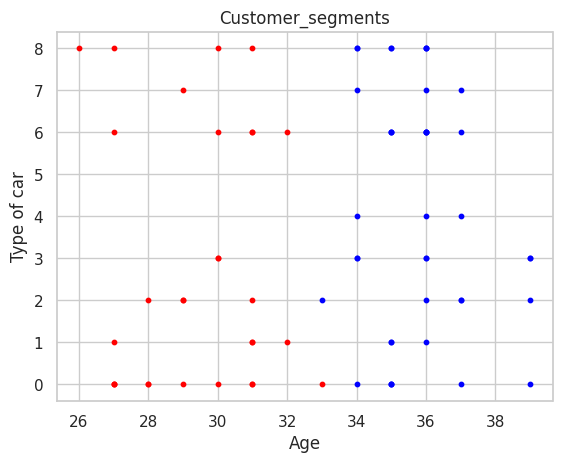

In [ ]:
#Age	Profession	Marrital Status	Education	No of Dependents
clus = data_car.loc[:,["Age","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Age","Type of car"])

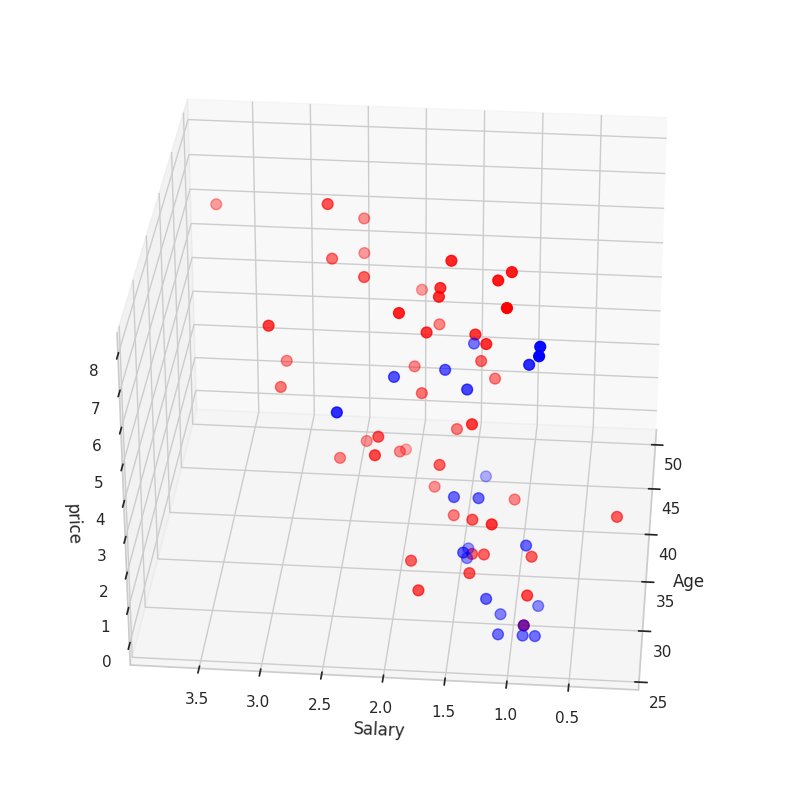

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_car.Age[labels == 0], data_car["Salary"][labels == 0], data_car["Make"][labels == 0],  c='blue', s=60)
ax.scatter(data_car.Age[labels == 1], data_car["Salary"][labels == 1], data_car["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

In [ ]:
p=d[d.clusters==1]
p

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1
5,0.08,1,0,0,3,1,1,0,0.194444,0.000000,0.14,0.204152,1
6,0.20,1,0,0,4,0,0,1,0.277778,0.285714,0.32,0.377163,1
7,0.28,0,0,1,4,0,0,0,0.333333,0.000000,0.24,0.204152,1
8,0.32,0,0,1,4,0,0,0,0.500000,0.000000,0.36,0.342561,1
9,0.32,1,0,0,3,1,1,1,0.277778,0.333333,0.34,0.238754,1
10,0.36,1,0,1,4,0,0,1,0.305556,0.333333,0.36,0.515571,1
11,0.36,1,0,0,4,1,1,0,0.333333,0.000000,0.24,0.204152,1
14,0.20,0,0,0,3,1,1,1,0.194444,0.190476,0.22,0.204152,1


In [ ]:
p.shape

(48, 13)

In [ ]:
q=d[d.clusters==0]
q

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0
12,0.12,1,0,1,0,0,0,1,0.194444,0.380952,0.30,0.000000,0
16,0.00,1,1,1,0,0,0,0,0.166667,0.000000,0.12,0.238754,0
17,0.04,1,1,0,0,1,0,1,0.166667,0.000000,0.12,0.204152,0
19,0.16,1,0,0,0,0,0,1,0.166667,0.238095,0.22,0.204152,0
36,0.12,0,0,1,0,0,0,1,0.194444,0.333333,0.28,0.377163,0
37,0.16,1,0,1,0,0,0,1,0.305556,0.380952,0.38,0.480969,0
38,0.16,0,1,1,0,0,0,0,0.333333,0.000000,0.24,0.515571,0
39,0.20,1,0,0,0,0,0,1,0.333333,0.380952,0.40,0.342561,0
41,0.24,0,0,1,0,0,0,0,0.333333,0.000000,0.24,0.342561,0


In [ ]:
q.shape

(22, 13)

In [ ]:
r = d[d.clusters==2]
r

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,2
13,0.16,0,1,1,2,1,0,0,0.333333,0.000000,0.24,0.238754,2
18,0.12,1,1,1,2,0,0,0,0.194444,0.000000,0.14,0.377163,2
25,0.36,1,0,0,2,0,0,1,0.444444,0.523810,0.54,0.515571,2
29,0.40,1,0,1,2,0,0,1,0.444444,0.428571,0.50,0.515571,2
44,0.32,1,0,1,2,1,1,0,0.388889,0.000000,0.28,0.238754,2
47,0.40,0,0,0,2,0,1,1,0.361111,0.523810,0.48,0.411765,2
48,0.40,1,0,1,2,0,1,1,0.250000,0.238095,0.28,0.238754,2
54,0.60,1,0,0,2,0,0,1,0.750000,0.857143,0.90,1.000000,2


In [ ]:
r.shape

(29, 13)